<a href="https://colab.research.google.com/github/MarioAvolio/proj-data-an/blob/main/Sentiment_Analysis_on_Food_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt # plotting
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import nltk
#https://www.nltk.org/

#NLTK is a leading platform for building Python programs to work with human language data. 
#It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, 
#along with a suite of text processing libraries for classification, tokenization, 
#stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength 
#NLP libraries, and an active discussion forum.

nltk.download('punkt')

nltk.download('stopwords')
# Downloading stop words from NLTK nltk.download ('stopwords')


from nltk.tokenize import word_tokenize
#Tokenizers divide strings into lists of substrings. For example, tokenizers can 
#be used to find the words and punctuation in a string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Constants and Methods

In [15]:
PATH_PROJ = "/content/drive/MyDrive/data-proj/"
# if not os.path.exists(PATH_PROJ):
#   PATH_PROJ = "/content/drive/MyDrive/shared/data-proj/"

In [16]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('Number of sentences')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# Pipeline

We would normally
walk through the requirements and break the problem down into several subproblems, then try to develop a step-by-step procedure to solve them. Since language
processing is involved, we would also list all the forms of text processing needed at
each step. This step-by-step processing of text is known as a pipeline. It is the series of
steps involved in building any NLP model. These steps are common in every NLP
project

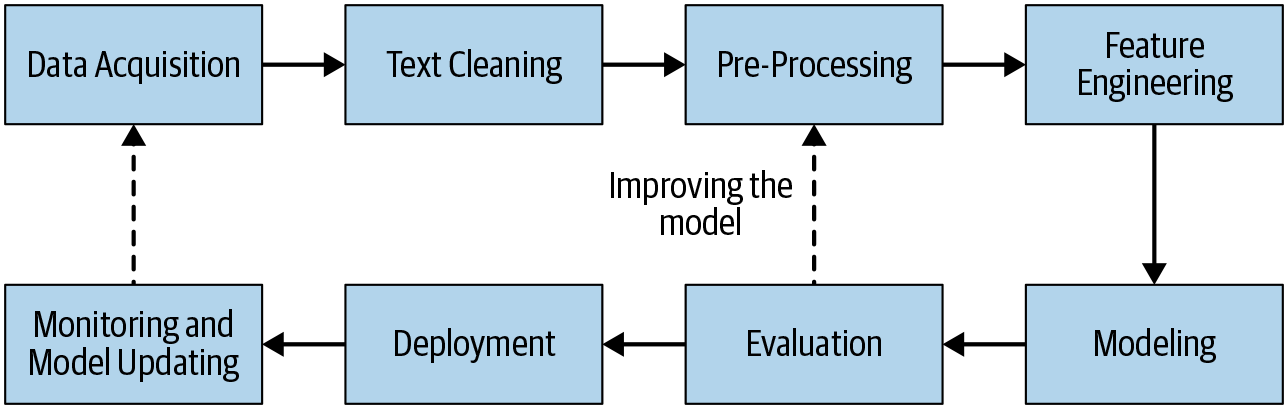

The first step in the process of developing any NLP system is to collect data relevant
to the given task. Even if we’re building a rule-based system, we still need some data
to design and test our rules. The data we get is seldom clean, and this is where text
cleaning comes into play. After cleaning, text data often has a lot of variations and
needs to be converted into a canonical form. This is done in the pre-processing step.
This is followed by feature engineering, where we carve out indicators that are most
suitable for the task at hand. These indicators are converted into a format that is
understandable by modeling algorithms. Then comes the modeling and evaluation
phase, where we build one or more models and compare and contrast them using a
relevant evaluation metric(s). Once the best model among the ones evaluated is
chosen, we move toward deploying this model in production. Finally, we regularly
monitor the performance of the model and, if need be, update it to keep up its
performance.


# Data Acquisition

In [17]:
# Read TSV file into DataFrame
# df = pd.read_table(PATH_PROJ+'food.tsv', encoding='latin-1')
# print(df)

In [18]:
df = pd.read_csv(PATH_PROJ+'food.csv')

In [19]:
df

,productid,userid,score,text
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1.0,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4.0,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2.0,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,Great taffy at a great price. There was a wid...
...,...,...,...,...
35167,B000E1DSQS,A2QG0Z96HULRW7,5.0,"Once I tasted Hazelnut coffee, I was hooked! N..."
35168,B000E1DSQS,A3F653OGB0ZF4X,5.0,Has Maxwell House quit making this coffee? I ...
35169,B000E1DSQS,AJD41FBJD9010,5.0,"Nutty, smooth, subtle, with a WONDERFUL aroma-..."
35170,B000E1DSQS,A33R5P618X7MG7,5.0,Price was right and the taste very good. We w...


In [20]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(35172, 4)


In [21]:
print(df.columns)

Index(['productid', 'userid', 'score', 'text'], dtype='object')


In [22]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 35172 rows and 4 columns


In [23]:
df.head(6)

,productid,userid,score,text
0,B001E4KFG0,A3SGXH7AUHU8GW,5.0,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,1.0,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,4.0,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,2.0,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5.0,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,ADT0SRK1MGOEU,4.0,I got a wild hair for taffy and ordered this f...


Let's isolate the useful columns to our end. 

In [24]:
df = df[["text","score"]]

In [25]:
df.iloc[30:40]

,text,score
30,"I have never been a huge coffee fan. However, ...",5.0
31,"This offer is a great price and a great taste,...",5.0
32,McCann's Instant Oatmeal is great if you must ...,4.0
33,This is a good instant oatmeal from the best o...,4.0
34,Instant oatmeal can become soggy the minute th...,5.0
35,"McCann's Instant Irish Oatmeal, Variety Pack o...",4.0
36,For those of us with celiac disease this produ...,5.0
37,"What else do you need to know? Oatmeal, instan...",5.0
38,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...,4.0
39,I ordered this for my wife as it was reccomend...,5.0


In [26]:
review = df['text'] 
review.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: text, dtype: object

# Text Extraction and Cleanup
Text extraction and cleanup refers to the process of extracting raw text from the input
data by removing all the other non-textual information, such as markup, metadata,
etc., and converting the text to the required encoding format

In [69]:
from bs4 import BeautifulSoup

def clean_html_tags(row):
  soupified = BeautifulSoup(row, "html.parser")
  for linebreak in soupified.find_all('br'): #remove br
    linebreak.extract()

  span_tags = soupified.find_all('span') # remove span
  for span in span_tags:
      span.unwrap()
      
  return str(str(soupified).encode("utf-8")).replace("&lt;a href=\"http\'","") # utf-8 conversion

In [70]:
# for i in range(len(r)):
print(review.iloc[398])

print(clean_html_tags(review.iloc[398]))
  

HEY! These are GREAT Waffles and Pancakes! We have to add 50% more mix, tho, as the recipies on the bag are VERY thin. But we have a lot of fun with this Arrowhead Mills Buttermilk Pancake & Waffle Mix! We serve them "as is" with fried eggs and REAL maple syrup, <a href="http
b'HEY! These are GREAT Waffles and Pancakes! We have to add 50% more mix, tho, as the recipies on the bag are VERY thin. But we have a lot of fun with this Arrowhead Mills Buttermilk Pancake &amp; Waffle Mix! We serve them "as is" with fried eggs and REAL maple syrup, 


In [71]:
df['text'] = df['text'].apply(clean_html_tags)

<ipython-input-69-f2d0826e7115>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soupified = BeautifulSoup(row, "html.parser")
<ipython-input-71-39a0850c92a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_html_tags)


In [72]:
df

,text,score
0,b'I have bought several of the Vitality canned...,5.0
1,b'Product arrived labeled as Jumbo Salted Pean...,1.0
2,b'This is a confection that has been around a ...,4.0
3,b'If you are looking for the secret ingredient...,2.0
4,b'Great taffy at a great price. There was a w...,5.0
...,...,...
35167,"b""Once I tasted Hazelnut coffee, I was hooked!...",5.0
35168,"b""Has Maxwell House quit making this coffee? ...",5.0
35169,"b""Nutty, smooth, subtle, with a WONDERFUL arom...",5.0
35170,b'Price was right and the taste very good. We...,5.0


## Spelling Correction
In the world of fast typing and fat-finger typing, incoming text data often has
spelling errors. This can be prevalent in search engines, text-based chatbots deployed
on mobile devices, social media, and many other sources. While we remove HTML
tags and handle Unicode characters, this remains a unique problem that may hurt the
linguistic understanding of the data, and shorthand text messages in social micro‐
blogs often hinder language processing and context understanding

from: https://learn.microsoft.com/en-us/azure/cognitive-services/bing-spell-check/quickstarts/python

In [74]:
import requests
import json

In [81]:
def spelling_correction(example_text):
  api_key = "?"
  endpoint = "https://api.cognitive.microsoft.com/bing/v7.0/SpellCheck"

  # Create a new dictionary with text as the key, and your text as the value.
  data = {'text': example_text}

  # Add the parameters for your request:
  #   a. Assign your market code to the mkt parameter with the = operator. The market code is the code of the country/region you make the request from.
  #   b. Add the mode parameter with the & operator, and then assign the spell-check mode. The mode can be either proof (catches most spelling/grammar errors) or spell (catches most spelling errors, but not as many grammar errors).

  params = {
    'mkt':'en-us',
    'mode':'proof'
    }

  # Add a Content-Type header and your subscription key to the Ocp-Apim-Subscription-Key header.
  headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Ocp-Apim-Subscription-Key': api_key,
    }

  # Send the POST request by using the requests library.
  response = requests.post(endpoint, headers=headers, params=params, data=data)

  # Get the JSON response
  json_response = response.json()
  return json.dumps(json_response, indent=4)
  

In [82]:
# spelling_correction(review.iloc[10])

'{\n    "error": {\n        "code": "401",\n        "message": "Access denied due to invalid subscription key or wrong API endpoint. Make sure to provide a valid key for an active subscription and use a correct regional API endpoint for your resource."\n    }\n}'

# Pre-Processing
Our text-extraction step removed all this and gave us the plain text of the
article we need. However, all NLP software typically works at the sentence level and
expects a separation of words at the minimum. So, we need some way to split a text
into words and sentences before proceeding further in a processing pipeline. Some‐
times, we need to remove special characters and digits, and sometimes, we don’t care
whether a word is in upper or lowercase and want everything in lowercase. Many
more decisions like this are made while processing text. Such decisions are addressed
during the pre-processing step of the NLP pipeline. Here are some common preprocessing steps used in NLP software:

- Preliminaries: Sentence segmentation and word tokenization.
- Frequent steps: Stop word removal, stemming and lemmatization, removing digits/punctuation,
lowercasing, etc.
- Other steps: Normalization, language detection, code mixing, transliteration, etc.
- Advanced processing: POS tagging, parsing, coreference resolution, etc.

## Preliminaries

As mentioned earlier, NLP software typically analyzes text by breaking it up into
words (tokens) and sentences. Hence, any NLP pipeline has to start with a reliable
system to split the text into sentences (sentence segmentation) and further split a sen‐
tence into words (word tokenization)

In [ ]:
df.score.value_counts() 

In [ ]:
df.boxplot(column=['score'])  

## Textual Preprocessing

**NLTK** is one of the leading platforms for working with human language data and Python, the module NLTK is used for natural language processing. NLTK is literally an acronym for Natural Language Toolkit.

The first common step in NLP (Natural Language Processing) is **tokenization**. 

*Tokens* are usually individual words (at least in languages like English) and *tokenization* is taking a text or set of text and breaking it up into its individual words. 

**These tokens are then used as the input for other types of analysis or tasks.**

In [ ]:
#word_tokenize function

print(review.iloc[20])
print(word_tokenize(review.iloc[20]))

My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner.
['My', 'husband', 'is', 'a', 'Twizzlers', 'addict', '.', 'We', "'ve", 'bought', 'these', 'many', 'times', 'from', 'Amazon', 'because', 'we', "'re", 'government', 'employees', 'living', 'overseas', 'and', 'ca', "n't", 'get', 'them', 'in', 'the', 'country', 'we', 'are', 'assigned', 'to', '.', 'They', "'ve", 'always', 'been', 'fresh', 'and', 'tasty', ',', 'packed', 'well', 'and', 'arrive', 'in', 'a', 'timely', 'manner', '.']


When dealing with social media text, we usually want to identify urls, hashtags, smileys as separate objects and do not tokenize it to individual characters.

In [ ]:
#regular expression - regex: (sub)strings that we try to match with the text

In [ ]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False): #custom function
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [ ]:
#let's find out how it works

In [ ]:
print('Original sentence:')
print(review.iloc[100])
print()

print('Sentence after tokenization')
print(word_tokenize(review.iloc[100]))
print()

print('Sentence after tokenization with regex preprocessing')
print(preprocess(review.iloc[100]))

Original sentence:
The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.

Sentence after tokenization
['The', 'mouth', 'says', ',', '``', 'How', 'do', 'I', 'love', 'thee', ',', 'let', 'me', 'count', 'the', 'ways', '...', "''", '<', 'br', '/', '>', 'If', 'you', 'like', 'apple', 'products', 'a', 'must', 'have', 'item', '.', 'The', 'only', 'draw', 'back', ',', 'shipping', 'cost', '.', 'These', 'are', 'very', 'heavy', '.']

Sentence after tokenization with regex preprocessing
['The', 'mouth', 'says', ',', '"', 'How', 'do', 'I', 'love', 'thee', ',', 'let', 'me', 'count', 'the', 'ways', '.', '.', '.', '"', '<br />', 'If', 'you', 'like', 'apple', 'products', 'a', 'must', 'have', 'item', '.', 'The', 'only', 'draw', 'back', ',', 'shipping', 'cost', '.', 'These', 'are', 'very', 'heavy', '.']


apply a function to all element in a series

In [ ]:
review.apply(preprocess) #we haven't altered the series, we won't used our regex-based preprocesing 

0        [I, have, bought, several, of, the, Vitality, ...
1        [Product, arrived, labeled, as, Jumbo, Salted,...
2        [This, is, a, confection, that, has, been, aro...
3        [If, you, are, looking, for, the, secret, ingr...
4        [Great, taffy, at, a, great, price, ., There, ...
                               ...                        
35167    [Once, I, tasted, Hazelnut, coffee, ,, I, was,...
35168    [Has, Maxwell, House, quit, making, this, coff...
35169    [Nutty, ,, smooth, ,, subtle, ,, with, a, WOND...
35170    [Price, was, right, and, the, taste, very, goo...
35171    [This, sauce, gives, you, authentic, tonkatsu,...
Name: text, Length: 35172, dtype: object

In [ ]:
review = review.apply(lambda x: x.lower())  #to set in lowercase is important

In [ ]:
print(review)

0        i have bought several of the vitality canned d...
1        product arrived labeled as jumbo salted peanut...
2        this is a confection that has been around a fe...
3        if you are looking for the secret ingredient i...
4        great taffy at a great price.  there was a wid...
                               ...                        
35167    once i tasted hazelnut coffee, i was hooked! n...
35168    has maxwell house quit making this coffee?  i ...
35169    nutty, smooth, subtle, with a wonderful aroma-...
35170    price was right and the taste very good.  we w...
35171    this sauce gives you authentic tonkatsu flavor...
Name: text, Length: 35172, dtype: object


In [ ]:
# TODO: continue


Let's count the **frequency** of each word in the dataset.

In [ ]:
from collections import Counter

# list all of words
flat_list = [item for sublist in tweets_tokenized for item in sublist]
flat_list

['two',
 'places',
 "i'd",
 'invest',
 'all',
 'my',
 'money',
 'if',
 'i',
 'could',
 ':',
 '3d',
 'printing',
 'and',
 'self-driving',
 'cars',
 '!',
 '!',
 '!',
 'awesome',
 '!',
 'google',
 'driverless',
 'cars',
 'will',
 'help',
 'the',
 'blind',
 'travel',
 'more',
 'often',
 ';',
 'https://t.co/qwuxr0frbpv',
 'if',
 'google',
 'maps',
 "can't",
 'keep',
 'up',
 'with',
 'road',
 'construction',
 ',',
 'how',
 'am',
 'i',
 'supposed',
 'to',
 'trust',
 'a',
 'driverless',
 'car',
 'to',
 'get',
 'around',
 'here',
 '?',
 'autonomous',
 'cars',
 'seem',
 'way',
 'overhyped',
 'given',
 'the',
 'technology',
 'challenges',
 ';',
 'pilotless',
 'planes',
 'seem',
 'much',
 'more',
 'doable',
 'and',
 'needed',
 '.',
 'just',
 'saw',
 'google',
 'self-driving',
 'car',
 'on',
 'i',
 '-',
 '34',
 '.',
 'it',
 'was',
 'painted',
 'green',
 'and',
 'blue',
 '.',
 'will',
 'driverless',
 'cars',
 'eventually',
 'replace',
 'taxi',
 'drivers',
 'in',
 'cities',
 '?',
 'chicago',
 'metro'

# Lexicon-based approach

The **AFINN** lexicon is a list of **English terms** manually rated for valence with an integer between -5 (negative) and +5 (positive) by Finn Årup Nielsen between 2009 and 2011.

https://arxiv.org/pdf/1103.2903.pdf

In [ ]:
!pip install afinn
from afinn import Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
afinn = Afinn(emoticons=True)

In [ ]:
df['afinn'] = df["text"].apply(afinn.score) 
df.head(10)

<ipython-input-18-271c8f2fa21e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['afinn'] = df["text"].apply(afinn.score)


,text,score,afinn
0,I have bought several of the Vitality canned d...,5.0,16.0
1,Product arrived labeled as Jumbo Salted Peanut...,1.0,-2.0
2,This is a confection that has been around a fe...,4.0,3.0
3,If you are looking for the secret ingredient i...,2.0,3.0
4,Great taffy at a great price. There was a wid...,5.0,9.0
5,I got a wild hair for taffy and ordered this f...,4.0,2.0
6,This saltwater taffy had great flavors and was...,5.0,6.0
7,This taffy is so good. It is very soft and ch...,5.0,9.0
8,Right now I'm mostly just sprouting this so my...,5.0,3.0
9,This is a very healthy dog food. Good for thei...,5.0,8.0


In [ ]:
df.iloc[0]

text     I have bought several of the Vitality canned d...
score                                                  5.0
afinn                                                 16.0
Name: 0, dtype: object

In [ ]:
df.afinn.value_counts() 

 6.0     2726
 5.0     2676
 3.0     2548
 7.0     2325
 8.0     2317
         ... 
 65.0       1
 46.0       1
 98.0       1
-30.0       1
-24.0       1
Name: afinn, Length: 89, dtype: int64

<Axes: >

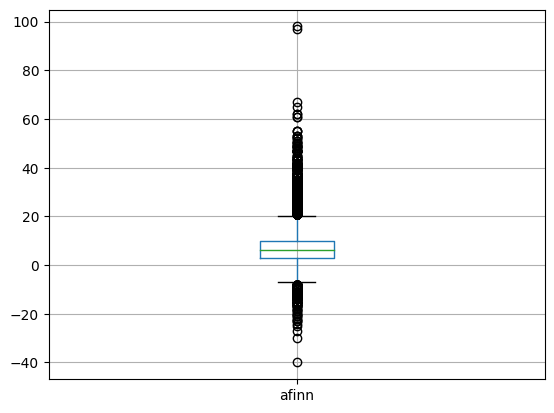

In [ ]:
df.boxplot(column=['afinn'])  

In [ ]:
#let's compute the range of afinn scores in this dataset
abs(min(df.afinn.value_counts().index.astype(int)) - max(df.afinn.value_counts().index.astype(int)))

138

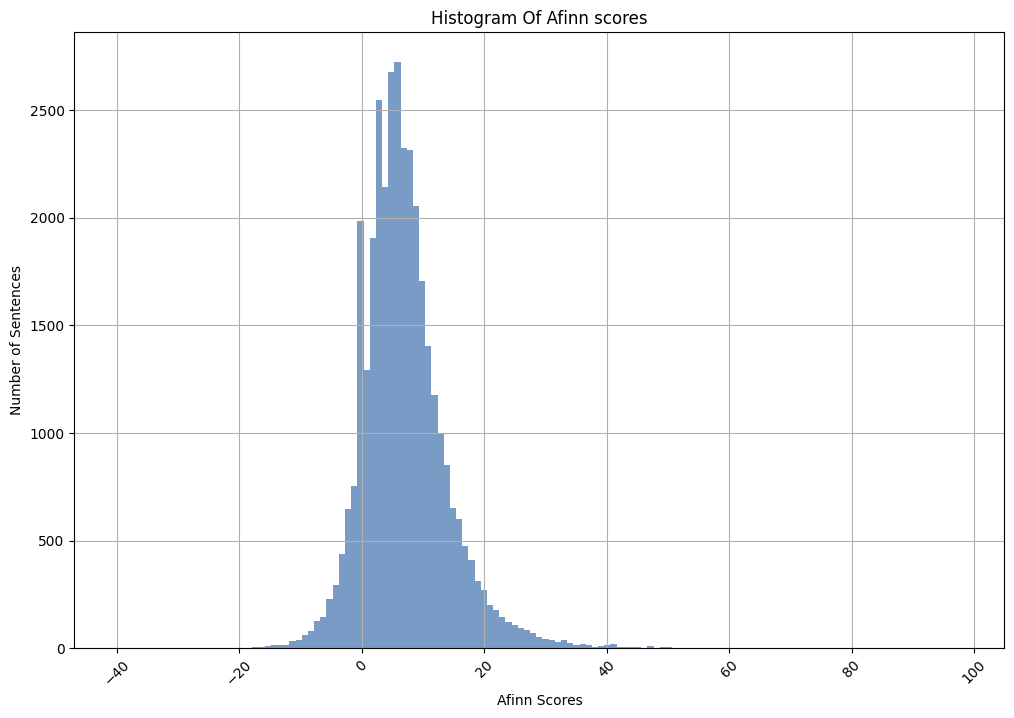

In [ ]:
df.afinn.plot(kind='hist', #takes the column name as input
        alpha=0.7,
        bins = abs(min(df.afinn.value_counts().index.astype(int)) - max(df.afinn.value_counts().index.astype(int)))-1,
        title='Histogram Of Afinn scores',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=10, 
        color=['#3F72AF'])
plt.xlabel('Afinn Scores')
plt.ylabel("Number of Sentences");

In [ ]:
pd.crosstab(df.score, df.afinn) #confusion matrix

afinn,-40.0,-30.0,-27.0,-25.0,-24.0,-23.0,-22.0,-21.0,-20.0,-19.0,...,51.0,52.0,53.0,55.0,61.0,62.0,65.0,67.0,97.0,98.0
score,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,1,1,1,3,0,2,2,3,...,1,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4.0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,2,0,0,0,0
5.0,0,0,0,0,0,0,0,0,0,0,...,1,3,3,2,1,0,1,1,1,1


In [ ]:
# Compute 3-class confusion matrix
confusion = pd.crosstab(np.sign(df.score - 3), # score has valus from 1 to 5 
                        # Returns an element-wise indication of the sign of a number.
                        # The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. nan is returned for nan inputs.
                        np.sign(df.afinn))
confusion

afinn,-1.0,0.0,1.0
score,,,
-1.0,1571,593,3060
0.0,312,257,2291
1.0,1051,1133,24904


Note that for "positive prediction" afinn method achives a sufficient result.

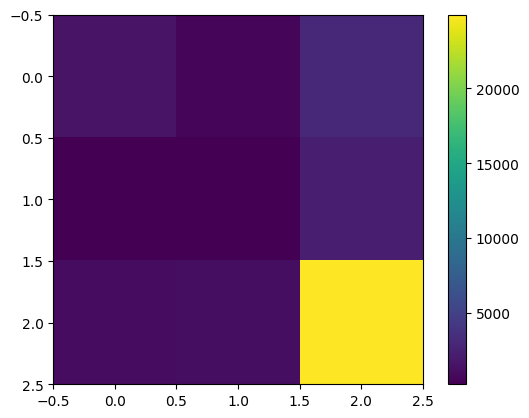

In [ ]:
shw = plt.imshow(confusion)
bar = plt.colorbar(shw)

In [ ]:
accuracy_3_class = np.sum(np.diag(confusion)) / np.sum(confusion.values)
accuracy_3_class

0.7600363925850108

In [ ]:
# Compute 2-class confusion matrix
confusion_2_class = confusion.iloc[[0, 2], [0, 2]] #beware! 
confusion_2_class

afinn,-1.0,1.0
score,,
-1.0,1571,3060
1.0,1051,24904


In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.8655921009612241

Use as **baseline** the most frequent class.

In [ ]:
accuracy_2_class_baseline = confusion_2_class.sum().max() / np.sum(confusion_2_class.values)
accuracy_2_class_baseline

0.9142745046753417